# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [81]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [74]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [82]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [84]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'customer lifetime value':'customer_lifetime_value',
                            'effective to date':'effective_to_date',
                            'employmentstatus':'employment_status', 'number of open complaints':'number_of_open_complaints', 'number of policies': 'number_of_policies', 'policy type':'policy_type', 'renew offer type':'renew_offer_type', 'sales channel':'sales_channel', 'total claim amount': 'total_claim_amount', 'vehicle class':'vehicle_class', 'vehicle size': 'vehicle_size', 'vehicle type':'vehicle_type', 'location code':'location_code', 'marital status':'marital_status', 'monthly premium auto':'monthly_premium_auto', 'months since last claim': 'months_since_last_claim', 'months since policy inception':'months_since_policy_inception'})


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [86]:
data.shape

(9134, 24)

In [87]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [108]:
numerical = data.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [109]:
categorical = data.select_dtypes(include=np.object)
categorical

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


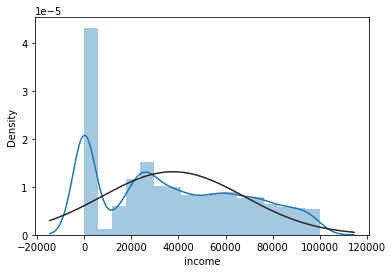

In [110]:
#Use seaborn library to construct distribution plots for the numerical variables

sns.distplot(numerical.income, fit = norm);


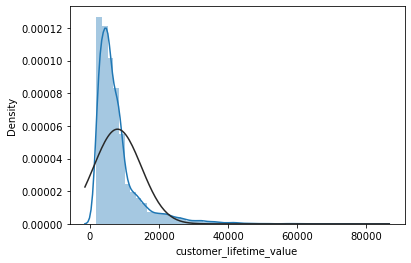

In [131]:
sns.distplot(numerical.customer_lifetime_value, fit = norm);

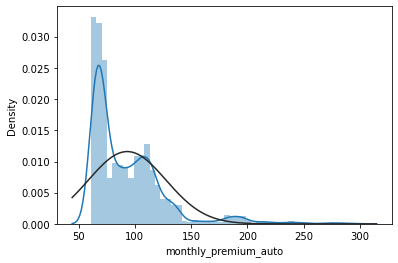

In [111]:
sns.distplot(numerical.monthly_premium_auto,fit = norm);

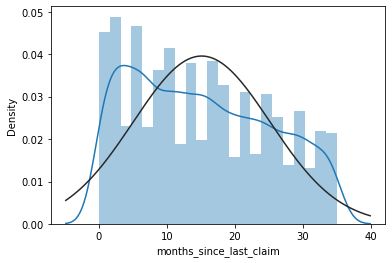

In [112]:
sns.distplot(numerical.months_since_last_claim,fit = norm);

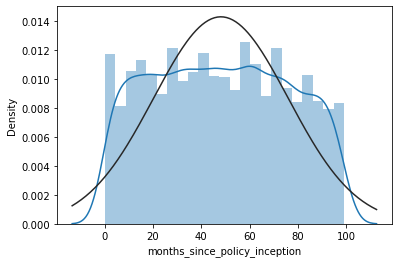

In [113]:
sns.distplot(numerical.months_since_policy_inception,fit = norm);

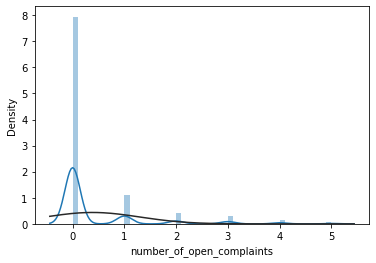

In [114]:
sns.distplot(numerical.number_of_open_complaints,fit = norm);

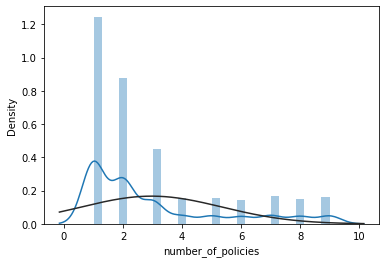

In [115]:
sns.distplot(numerical.number_of_policies,fit = norm);

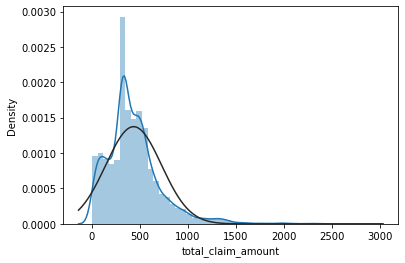

In [132]:
sns.distplot(numerical.total_claim_amount,fit = norm);

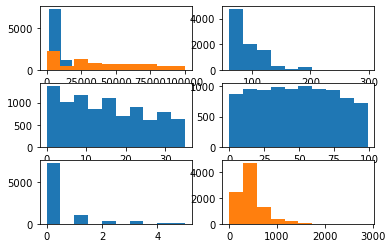

In [130]:
#Use Matplotlib to construct histograms
fig, axs = plt.subplots(3, 2)

axs[0, 0].hist(data['customer_lifetime_value'])
axs[0, 0].hist(data['income'])
axs[0, 1].hist(data['monthly_premium_auto'])
axs[1, 0].hist(data['months_since_last_claim'])
axs[1, 1].hist(data['months_since_policy_inception'])
axs[2, 0].hist(data['number_of_open_complaints'])
axs[2, 1].hist(data['number_of_policies'])
axs[2, 1].hist(data['total_claim_amount'])

plt.show()

In [117]:
#Do the distributions for different numerical variables look like a normal distribution?
#ANSWER: TOTAL_CLAIM_AMOUNT LOOKS CLOSEST TO A NORMAL DISTRIBUTION BUT OTHERS NOT

In [129]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [118]:
#The linear model has the formula:

#y = a * X + b
#Where:
#b is the 'intercept': where the regression line crosses the y axis;
#a is the 'coeficient': it's what your model will calculate;
#X is a value from a columns.

In [122]:
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit() # to train the model

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:04:14   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [124]:
#dropped unimportant data from p_value bigger than 0.5
X = numerical.drop(['total_claim_amount', 'number_of_open_complaints', 'number_of_policies'], axis=1)
y = numerical['total_claim_amount']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1967.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9128   BIC:                         1.229e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

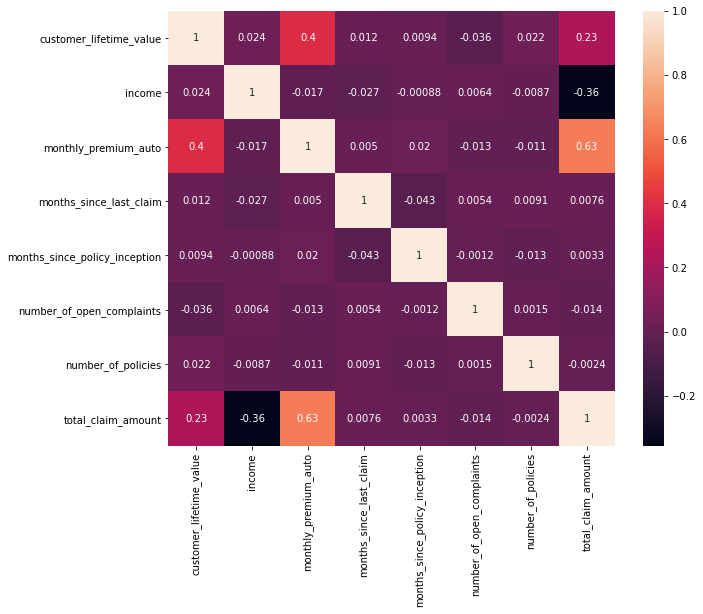

In [127]:
#Answer: from the below heatmap there are no pair that has greater than 0.9, therefore there is no high corelation.

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(method='pearson'), annot=True)
plt.show()
